In [10]:
import pandas as pd

In [11]:
dataset_url = 'https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx'
df = pd.read_excel(dataset_url)

In [12]:
df.shape

(1291, 19)

In [13]:
df.head()

,Position ID,Action,Amount,Units,Open Date,Close Date,Leverage,Spread Fees (USD),Market Spread (USD),Profit(USD),Open Rate,Close Rate,Take profit rate,Stop lose rate,Rollover Fees and Dividends,Copied From,Type,ISIN,Notes
0,1.384783e+09,Buy Bitcoin,669.65,0.010000,09/11/2021 16:01:49,31/12/2023 16:41:10,1.0,8.52,-0.24,-247.85,66965.35,42180.67,0.0,0.01,0.0,-,Crypto,NaN,NaN
1,1.437907e+09,Buy XRP,10.16,10.000984,23/12/2021 21:11:22,31/12/2023 16:34:05,1.0,0.12,-0.02,-4.00,1.02,0.62,0.0,0.00,0.0,-,Crypto,NaN,NaN
2,2.482603e+09,Buy XRP,10.00,12.806885,14/07/2023 16:11:36,31/12/2023 16:34:05,1.0,0.16,-0.02,-2.11,0.78,0.62,0.0,0.00,0.0,-,Crypto,NaN,NaN
3,1.425546e+09,Buy XRP,10.00,11.817537,09/12/2021 09:39:33,31/12/2023 16:34:05,1.0,0.15,-0.01,-2.72,0.85,0.62,0.0,0.00,0.0,-,Crypto,NaN,NaN
4,1.439409e+09,Buy XRP,13.98,15.480000,28/12/2021 04:08:38,31/12/2023 16:34:05,1.0,0.19,-0.02,-4.44,0.90,0.62,0.0,0.00,0.0,-,Crypto,NaN,NaN


In [14]:
df.columns

Index(['Position ID', 'Action', 'Amount', 'Units', 'Open Date', 'Close Date',
       'Leverage', 'Spread Fees (USD)', 'Market Spread (USD)', 'Profit(USD)',
       'Open Rate', 'Close Rate', 'Take profit rate', 'Stop lose rate',
       'Rollover Fees and Dividends', 'Copied From', 'Type', 'ISIN', 'Notes'],
      dtype='object')

In [15]:
df['Copied From'] = df['Copied From'].str.replace('-', 'myself')
df.head()

,Position ID,Action,Amount,Units,Open Date,Close Date,Leverage,Spread Fees (USD),Market Spread (USD),Profit(USD),Open Rate,Close Rate,Take profit rate,Stop lose rate,Rollover Fees and Dividends,Copied From,Type,ISIN,Notes
0,1.384783e+09,Buy Bitcoin,669.65,0.010000,09/11/2021 16:01:49,31/12/2023 16:41:10,1.0,8.52,-0.24,-247.85,66965.35,42180.67,0.0,0.01,0.0,myself,Crypto,NaN,NaN
1,1.437907e+09,Buy XRP,10.16,10.000984,23/12/2021 21:11:22,31/12/2023 16:34:05,1.0,0.12,-0.02,-4.00,1.02,0.62,0.0,0.00,0.0,myself,Crypto,NaN,NaN
2,2.482603e+09,Buy XRP,10.00,12.806885,14/07/2023 16:11:36,31/12/2023 16:34:05,1.0,0.16,-0.02,-2.11,0.78,0.62,0.0,0.00,0.0,myself,Crypto,NaN,NaN
3,1.425546e+09,Buy XRP,10.00,11.817537,09/12/2021 09:39:33,31/12/2023 16:34:05,1.0,0.15,-0.01,-2.72,0.85,0.62,0.0,0.00,0.0,myself,Crypto,NaN,NaN
4,1.439409e+09,Buy XRP,13.98,15.480000,28/12/2021 04:08:38,31/12/2023 16:34:05,1.0,0.19,-0.02,-4.44,0.90,0.62,0.0,0.00,0.0,myself,Crypto,NaN,NaN


In [16]:
# Calculate the average/mean profit for each type. The forumula for average/mean is the default, so we don't have to write it explicitly.
# pivot_type = pd.pivot_table(df, index='Type', values='Profit(USD)', aggfunc='mean')
pivot_type = pd.pivot_table(df, index='Type', values='Profit(USD)')
pivot_type

,Profit(USD)
Type,
CFD,-1.015185
Crypto,-15.457200
ETF,-3.854000
Stocks,0.295394


In [17]:
# Calculate the sum of profits for CFD, Crypto, ETF and Stocks.
pivot_type = pd.pivot_table(data=df, index='Type', values='Profit(USD)', aggfunc='sum')
pivot_type

,Profit(USD)
Type,
CFD,-246.69
Crypto,-772.86
ETF,-77.08
Stocks,288.60


In [18]:
# Calculate the sum of profits for different action types.
pivot_action = pd.pivot_table(data=df, index='Action', values='Profit(USD)', aggfunc='sum')
pivot_action.tail(25)

,Profit(USD)
Action,
Buy iShares MSCI South Korea ETF,4.99
Buy iShares MSCI Thailand ETF,0.13
Buy iShares NASDAQ 100 UCITS ETF usd,0.06
Buy iShares iBoxx $ Investment Grade Corporate Bond ETF,-0.07
Sell AUD/USD,3.32
Sell Affirm,-2.26
Sell C3.ai Inc.,4.08
Sell DJ30 Index,0.08
Sell EUR/AUD,-1.00


In [19]:
# Calculate the sum of money spent for different action types.
pivot_action = pd.pivot_table(data=df, index='Action', values='Amount', aggfunc='sum')
pivot_action

,Amount
Action,
Buy ABB LTD,27.73
Buy AGNC Investment Corp,15.36
Buy AMG Advanced Metallurgical Group NV,15.78
Buy ARK Autonomous Technology & Robotics ETF,11.45
Buy ARK Fintech Innovation ETF,10.75
...,...
Sell Snapchat Inc,6.64
Sell Snowflake Inc.,4.53
"Sell Tesla Motors, Inc.",8.92


In [20]:
# Calculate the sum of money spent, minmum amount spent, maximum amount spent, and average amount spent for different action types.
pivot_action = pd.pivot_table(data=df, index='Action', values='Amount', aggfunc=['sum', 'mean', 'max', 'min'])
pivot_action

,sum,mean,max,min
,Amount,Amount,Amount,Amount
Action,,,,
Buy ABB LTD,27.73,9.243333,9.91,8.91
Buy AGNC Investment Corp,15.36,15.360000,15.36,15.36
Buy AMG Advanced Metallurgical Group NV,15.78,7.890000,7.90,7.88
Buy ARK Autonomous Technology & Robotics ETF,11.45,11.450000,11.45,11.45
Buy ARK Fintech Innovation ETF,10.75,10.750000,10.75,10.75
...,...,...,...,...
Sell Snapchat Inc,6.64,6.640000,6.64,6.64
Sell Snowflake Inc.,4.53,4.530000,4.53,4.53


In [21]:
# Calculate the sum of profits made, minmum profit made, maximum profit made, and average average profit made for different action types.
pivot_action = pd.pivot_table(data=df, index='Action', values='Profit(USD)', aggfunc=['sum', 'mean', 'max', 'min'])
pivot_action
# Write the pivot table to an excel file.
# pivot_action.to_excel("etoro_profits.xlsx", sheet_name='min_max_mean_total_profit')

,sum,mean,max,min
,Profit(USD),Profit(USD),Profit(USD),Profit(USD)
Action,,,,
Buy ABB LTD,5.40,1.80,3.33,0.20
Buy AGNC Investment Corp,-6.11,-6.11,-6.11,-6.11
Buy AMG Advanced Metallurgical Group NV,0.36,0.18,0.19,0.17
Buy ARK Autonomous Technology & Robotics ETF,-5.16,-5.16,-5.16,-5.16
Buy ARK Fintech Innovation ETF,-6.27,-6.27,-6.27,-6.27
...,...,...,...,...
Sell Snapchat Inc,0.54,0.54,0.54,0.54
Sell Snowflake Inc.,-0.37,-0.37,-0.37,-0.37


In [22]:
# What was the maximum profit made for any action type?
pivot_action = pd.pivot_table(data=df, index='Action', values='Profit(USD)', aggfunc='max').max()
pivot_action

Profit(USD)    154.32
dtype: float64

In [23]:
# Find the Action type that made the most profit and show the name of that action type.
"""
This line creates a pivot table using Pandas' pivot_table() function.
It groups the data by the 'Action' column and calculates the maximum profit for each action type.
The .max() function is then applied again to find the overall maximum profit across all action types.
"""
pivot_action = pd.pivot_table(data=df, index='Action', values='Profit(USD)', aggfunc='max').max()
"""
This line filters the DataFrame df to select rows where the 'Profit(USD)' column equals the maximum profit value calculated in the pivot table.
.iloc[0] is used to select the first row among those rows (in case there are multiple rows with the maximum profit).
"""
max_profit = df[df['Profit(USD)'] == pivot_action['Profit(USD)']].iloc[0]
stock_with_max_profit = max_profit['Action']
print("Stock with maximum profit:", stock_with_max_profit)

Stock with maximum profit: Buy Alphabet


In [24]:
# Make a mask for filtering the column 'Profit(USD)' and the criteria for filter is the maximum profit for any action type.
pivot_action = pd.pivot_table(data=df, index='Action', values='Profit(USD)', aggfunc='max').max() # This returns 154.32
pivot_action

Profit(USD)    154.32
dtype: float64

In [25]:
# Use the filter above to selects the rows where the condition is True, i.e., the rows where the profit equals the maximum profit.
df[df['Profit(USD)'] == pivot_action['Profit(USD)']]

,Position ID,Action,Amount,Units,Open Date,Close Date,Leverage,Spread Fees (USD),Market Spread (USD),Profit(USD),Open Rate,Close Rate,Take profit rate,Stop lose rate,Rollover Fees and Dividends,Copied From,Type,ISIN,Notes
384,2.333196e+09,Buy Alphabet,604.92,6.0,02/12/2022 20:05:31,25/10/2023 19:17:49,1.0,0.0,-0.06,154.32,100.82,126.54,0.0,0.0,0.0,myself,Stocks,US02079K1079,NaN


### Find the stock that made the minimum profit in all the closed transactions in 2023.

In [26]:
# Find the Action type that made the least profit and show the name of that action type.
pivot_action = pd.pivot_table(data=df, index='Action', values='Profit(USD)', aggfunc='min').min()
print("The least profit made by any action type is minimum profit:", pivot_action)
min_profit = df[df['Profit(USD)'] == pivot_action['Profit(USD)']].iloc[0]
stock_with_min_profit = min_profit['Action']
print("Stock with minimum profit:", stock_with_min_profit)

The least profit made by any action type is minimum profit: Profit(USD)   -763.07
dtype: float64
Stock with minimum profit: Buy Nio Inc.-ADR


In [27]:
pivot_action2 = pd.pivot_table(df, index='Type', columns='Copied From', values='Profit(USD)', aggfunc='sum')
pivot_action2

Copied From,CPHequities,CashFlowStation,Dividends_Income,Emeryturadlakasi,JeppeKirkBonde,Jolubo,Wesl3y,jaynemesis,myself,rubymza
Type,,,,,,,,,,
CFD,1.49,-171.58,-46.69,NaN,-0.01,NaN,NaN,-6.29,2.01,-25.62
Crypto,-1.28,NaN,NaN,NaN,NaN,-55.04,NaN,-1.76,-708.88,-5.90
ETF,NaN,-37.65,NaN,NaN,0.09,-39.52,NaN,NaN,NaN,NaN
Stocks,114.09,-68.51,-4.25,-15.49,-38.23,-321.39,299.15,-320.48,669.20,-25.49


In [28]:
pd.set_option('display.max_rows', None)

In [29]:
# What is the average profit made in each category by each CopyTrader in all the closed transaction in 2023?
pivot_action3 = pd.pivot_table(df, index=['Type', 'Action'], columns='Copied From', values='Profit(USD)', aggfunc='mean')
pivot_action3

Copied From                                                CPHequities  \
Type   Action                                                            
CFD    Buy ARK Autonomous Technology & Robotics ETF                NaN   
       Buy ARK Fintech Innovation ETF                              NaN   
       Buy ARK Genomic Revolution ETF                              NaN   
       Buy ARK Next Generation Internet ETF                        NaN   
       Buy AUD/USD                                           -0.465000   
       Buy Apple                                                   NaN   
       Buy CAD/CHF                                            2.480000   
       Buy Canadian Pacific Railway LTD                            NaN   
       Buy Cedar Fair LP                                           NaN   
       Buy Direxion Daily 20 Year Plus Treasury Bull 3...          NaN   
       Buy Direxion Daily S&P 500 Bull 3X                          NaN   
       Buy Direxion Daily S&P Biotech Bull 3X Shares          2.000000   
       Buy Direxion Daily Semiconductors Bull 3x Shares       1.745000   
       Buy Direxion Daily Small Cap Bull 3X Shares                 NaN   
       Buy EUR/CHF                                           -0.140000   
       Buy EUR/GBP                                           -0.310000   
       Buy EUR/USD                                            0.120000   
       Buy Energy Select Sector SPDR                          0.590000   
       Buy Eni Energy Company                                 1.360000   
       Buy Enphase Energy Inc.                                     NaN   
       Buy First Trust Water ETF                                   NaN   
       Buy GER40 Index                                        0.755000   
       Buy Global X Nasdaq 100 Covered Call ETF                    NaN   
       Buy Global X SuperDividend ETF                              NaN   
       Buy Gold                                              -0.150000   
       Buy Invesco DB US Dollar Index Bullish Fund           -0.965000   
       Buy Invesco QQQ                                        0.530000   
       Buy JPMorgan Ultra-Short Income ETF                         NaN   
       Buy KraneShares Global Carbon ETF                           NaN   
       Buy MicroSectors FANG+ Index 3X Leveraged ETN               NaN   
       Buy NASDAQ100 Index                                    4.470000   
       Buy NEL ASA                                                 NaN   
       Buy O'Shares US Quality Dividend ETF                        NaN   
       Buy Pilbara Minerals Limited                          -5.160000   
       Buy ProShares UltraPro QQQ                                  NaN   
       Buy ProShares UltraPro S&P 500                              NaN   
       Buy ProShares UltraPro Short QQQ                            NaN   
       Buy ProShares UltraPro Short S&P 500                        NaN   
       Buy Prysmian Group                                          NaN   
       Buy Russell 2000 Index                                 1.790000   
       Buy SPDR Gold                                               NaN   
       Buy The Health Care Select Sector SPDR Fund            0.194286   
       Buy USD/CAD                                            0.070000   
       Buy USD/JPY                                            0.130000   
       Buy USD/SGD                                           -0.290000   
       Buy Utilities Select Sector SPDR                      -1.802000   
       Buy VanEck Vectors Russia ETF                               NaN   
       Buy Vanguard Dividend Appreciation ETF                      NaN   
       Buy Vanguard Russell 1000 Growth ETF                        NaN   
       Buy iShares 20+ Year Treasury Bond ETF                 0.225000   
       Buy iShares Core FTSE 100 UCITS ETF (Dist)                  NaN   
       Buy iShares Core MSCI World UCITS ETF                       NaN   
    

In [30]:
# What is the average profit made in each category by each CopyTrader in all the closed transaction in 2023?
pivot_action3 = pd.pivot_table(df, index=['Type', 'Leverage', 'Action'], columns='Copied From', values='Profit(USD)', aggfunc='mean')
pivot_action3

Copied From                                                         CPHequities  \
Type   Leverage Action                                                            
CFD    1.0      Buy ARK Autonomous Technology & Robotics ETF                NaN   
                Buy ARK Fintech Innovation ETF                              NaN   
                Buy ARK Genomic Revolution ETF                              NaN   
                Buy ARK Next Generation Internet ETF                        NaN   
                Buy Canadian Pacific Railway LTD                            NaN   
                Buy Cedar Fair LP                                           NaN   
                Buy Direxion Daily 20 Year Plus Treasury Bull 3...          NaN   
                Buy Direxion Daily S&P 500 Bull 3X                          NaN   
                Buy Direxion Daily S&P Biotech Bull 3X Shares          2.000000   
                Buy Direxion Daily Semiconductors Bull 3x Shares       1.745000   
                Buy Direxion Daily Small Cap Bull 3X Shares                 NaN   
                Buy Energy Select Sector SPDR                          0.590000   
                Buy Eni Energy Company                                 1.360000   
                Buy First Trust Water ETF                                   NaN   
                Buy Global X Nasdaq 100 Covered Call ETF                    NaN   
                Buy Global X SuperDividend ETF                              NaN   
                Buy Invesco DB US Dollar Index Bullish Fund           -0.965000   
                Buy Invesco QQQ                                        0.530000   
                Buy JPMorgan Ultra-Short Income ETF                         NaN   
                Buy KraneShares Global Carbon ETF                           NaN   
                Buy MicroSectors FANG+ Index 3X Leveraged ETN               NaN   
                Buy NEL ASA                                                 NaN   
                Buy O'Shares US Quality Dividend ETF                        NaN   
                Buy Pilbara Minerals Limited                          -5.160000   
                Buy ProShares UltraPro QQQ                                  NaN   
                Buy ProShares UltraPro S&P 500                              NaN   
                Buy ProShares UltraPro Short QQQ                            NaN   
                Buy ProShares UltraPro Short S&P 500                        NaN   
                Buy Prysmian Group                                          NaN   
                Buy SPDR Gold                                               NaN   
                Buy The Health Care Select Sector SPDR Fund            0.194286   
                Buy Utilities Select Sector SPDR                      -1.802000   
                Buy VanEck Vectors Russia ETF                               NaN   
                Buy Vanguard Dividend Appreciation ETF                      NaN   
                Buy Vanguard Russell 1000 Growth ETF                        NaN   
                Buy iShares 20+ Year Treasury Bond ETF                 0.225000   
                Buy iShares Core FTSE 100 UCITS ETF (Dist)                  NaN   
                Buy iShares Core MSCI World UCITS ETF                       NaN   
                Buy iShares Core U.S. REIT ETF                              NaN   
                Buy iShares MSCI China ETF                                  NaN   
                Buy iShares MSCI Germany ETF                                NaN   
                Buy iShares MSCI India ETF                             1.240000   
                Buy iShares MSCI South Korea ETF                            NaN   
                Buy iShares MSCI Thailand ETF                               NaN   
                Buy iShares iBoxx $ Investment Grade Corporate ...          NaN   
                Sell Affirm                                                 NaN   
                

In [31]:
# Reset display options to default
pd.reset_option('display.max_rows')

In [32]:
# Group the DataFrame by 'Type' and 'Leverage' and extract unique leverages for each type
unique_leverages_by_type = df.groupby('Type')['Leverage'].unique()

# Display the unique leverages for each type
print("Different leverages used in each type:")
print(unique_leverages_by_type)

Different leverages used in each type:
Type
CFD       [1.0, 10.0, 5.0, 20.0, 2.0]
Crypto                          [1.0]
ETF                             [1.0]
Stocks                          [1.0]
Name: Leverage, dtype: object


## Find the unique CopyTraders who used leverage 20.

In [33]:
# Filter the DataFrame for rows where 'Leverage' is 20
leverage_20_df = df[df['Leverage'] == 20.0]
# Find the unique values in the column 'Copied From'.
unique_copied_from = leverage_20_df['Copied From'].unique()
# Display the results
print("CopyTrader(s) who used Leverage 20:")
print(unique_copied_from)

CopyTrader(s) who used Leverage 20:
['CPHequities']


## Find the unique Action Type for which leverage 20 was used.

In [34]:
# Filter the DataFrame for rows where 'Leverage' is 20
leverage_20_df = df[df['Leverage'] == 20.0]
# Finde the unique values in the column 'Action'.
unique_actions = leverage_20_df['Action'].unique()
print("\nAction(s) associated with Leverage 20:")
print(unique_actions)


Action(s) associated with Leverage 20:
['Buy AUD/USD' 'Buy EUR/USD' 'Sell USD/CAD' 'Sell GBP/CAD' 'Sell EUR/USD'
 'Buy EUR/CHF' 'Sell AUD/USD' 'Buy USD/SGD' 'Buy CAD/CHF' 'Buy USD/JPY']


In [35]:
# What is the average profit made in each category by each CopyTrader in all the closed transaction in 2023?
# Set display options to show all rows
pivot_action2 = pd.pivot_table(df, index='Type', columns='Copied From', values='Profit(USD)', aggfunc='mean')
pivot_action2

Copied From,CPHequities,CashFlowStation,Dividends_Income,Emeryturadlakasi,JeppeKirkBonde,Jolubo,Wesl3y,jaynemesis,myself,rubymza
Type,,,,,,,,,,
CFD,0.019103,-2.767419,-1.197179,NaN,-0.010000,NaN,NaN,-0.224643,2.010000,-0.753529
Crypto,-0.640000,NaN,NaN,NaN,NaN,-18.346667,NaN,-0.440000,-17.722000,-5.900000
ETF,NaN,-3.422727,NaN,NaN,0.090000,-4.940000,NaN,NaN,NaN,NaN
Stocks,1.046697,-6.851000,-0.202381,-3.098,-0.647966,-2.380667,2.719545,-1.033806,6.373333,-0.225575


In [36]:
pivot_action2 = pd.pivot_table(df, index='Type', columns='Copied From', values='Profit(USD)', aggfunc='sum')
pivot_action2

Copied From,CPHequities,CashFlowStation,Dividends_Income,Emeryturadlakasi,JeppeKirkBonde,Jolubo,Wesl3y,jaynemesis,myself,rubymza
Type,,,,,,,,,,
CFD,1.49,-171.58,-46.69,NaN,-0.01,NaN,NaN,-6.29,2.01,-25.62
Crypto,-1.28,NaN,NaN,NaN,NaN,-55.04,NaN,-1.76,-708.88,-5.90
ETF,NaN,-37.65,NaN,NaN,0.09,-39.52,NaN,NaN,NaN,NaN
Stocks,114.09,-68.51,-4.25,-15.49,-38.23,-321.39,299.15,-320.48,669.20,-25.49


## Margins
#### In the table below, the value -808.03 in the last row and last column of the pivot table represents the total profit across all transactions for all categories and all copy traders ('Copied From'). This value indicates the overall profit generated from all transactions regardless of the specific type of asset or the copy trader who executed the trade. It's the aggregate profit across the entire dataset.

In [37]:
pivot_action2 = pd.pivot_table(df, index='Type', columns='Copied From', values='Profit(USD)', aggfunc='sum', margins=True)
pivot_action2

Copied From,CPHequities,CashFlowStation,Dividends_Income,Emeryturadlakasi,JeppeKirkBonde,Jolubo,Wesl3y,jaynemesis,myself,rubymza,All
Type,,,,,,,,,,,
CFD,1.49,-171.58,-46.69,NaN,-0.01,NaN,NaN,-6.29,2.01,-25.62,-246.69
Crypto,-1.28,NaN,NaN,NaN,NaN,-55.04,NaN,-1.76,-708.88,-5.90,-772.86
ETF,NaN,-37.65,NaN,NaN,0.09,-39.52,NaN,NaN,NaN,NaN,-77.08
Stocks,114.09,-68.51,-4.25,-15.49,-38.23,-321.39,299.15,-320.48,669.20,-25.49,288.60
All,114.30,-277.74,-50.94,-15.49,-38.15,-415.95,299.15,-328.53,-37.67,-57.01,-808.03


In [38]:
pivot_action2 = pd.pivot_table(df, index='Type', columns='Copied From', values='Profit(USD)', aggfunc='sum', margins=True, margins_name='Total')
pivot_action2

Copied From,CPHequities,CashFlowStation,Dividends_Income,Emeryturadlakasi,JeppeKirkBonde,Jolubo,Wesl3y,jaynemesis,myself,rubymza,Total
Type,,,,,,,,,,,
CFD,1.49,-171.58,-46.69,NaN,-0.01,NaN,NaN,-6.29,2.01,-25.62,-246.69
Crypto,-1.28,NaN,NaN,NaN,NaN,-55.04,NaN,-1.76,-708.88,-5.90,-772.86
ETF,NaN,-37.65,NaN,NaN,0.09,-39.52,NaN,NaN,NaN,NaN,-77.08
Stocks,114.09,-68.51,-4.25,-15.49,-38.23,-321.39,299.15,-320.48,669.20,-25.49,288.60
Total,114.30,-277.74,-50.94,-15.49,-38.15,-415.95,299.15,-328.53,-37.67,-57.01,-808.03


### Present the output in a two-dimensional table form where you can see which CopyTrader used Leverage 5 and for which Action.

In [39]:
# Filter the DataFrame for rows where 'Leverage' is 5
leverage_5_df = df[df['Leverage'] == 5.0]
# Create a DataFrame with 'Copied From' and 'Action' columns
leverage_5_table = leverage_5_df[['Copied From', 'Action', 'Profit(USD)']]
leverage_5_table

,Copied From,Action,Profit(USD)
297,rubymza,Sell NASDAQ100 Index,-1.54
433,CPHequities,Buy Gold,-0.46
541,CPHequities,Sell C3.ai Inc.,0.00
549,CPHequities,Sell C3.ai Inc.,0.90
550,CPHequities,Sell C3.ai Inc.,1.66
556,CPHequities,Buy EUR/USD,-0.27
577,CPHequities,Sell C3.ai Inc.,-2.36
594,CPHequities,Sell C3.ai Inc.,0.25
618,Dividends_Income,Sell GER40 Index,0.33
619,Dividends_Income,Sell GER40 Index,0.34


In [40]:
# What is the profit made on all the Action types where 'Leverage' is 5
df_leverage_5 = df[df['Leverage'] == 5.0]
pvt_action = pd.pivot_table(data=df_leverage_5, index='Action', values='Profit(USD)', aggfunc='max')
pvt_action

,Profit(USD)
Action,
Buy Apple,2.01
Buy EUR/USD,-0.27
Buy Gold,-0.46
Buy Russell 2000 Index,3.38
Sell C3.ai Inc.,1.66
Sell GER40 Index,0.34
Sell NASDAQ100 Index,-1.54


In [41]:
# What is the maximum profit made on all the Action types where 'Leverage' is 5
df_leverage_5 = df[df['Leverage'] == 5.0]
pvt_action = pd.pivot_table(data=df_leverage_5, index='Action', values='Profit(USD)', aggfunc='max')
max_profit_leverage_5 = pvt_action['Profit(USD)'].max()
max_profit_leverage_5
action_that_gives_max_profit_with_leverage_5 = pvt_action[pvt_action['Profit(USD)'] == max_profit_leverage_5]
action_that_gives_max_profit_with_leverage_5

,Profit(USD)
Action,
Buy Russell 2000 Index,3.38


In [42]:
# What is the profit made on all the Action types where 'Leverage' is 2
df_leverage_2 = df[df['Leverage'] == 2.0]
pvt_action = pd.pivot_table(data=df_leverage_2, index='Action', values='Profit(USD)', aggfunc='max')
pvt_action

,Profit(USD)
Action,
Buy Enphase Energy Inc.,1.68
Sell C3.ai Inc.,3.63
Sell MicroStrategy Incorporated,-1.43
Sell Shutterstock Inc.,-2.69


In [43]:
# What is the maximum profit made on all the Action types where 'Leverage' is 2
df_leverage_2 = df[df['Leverage'] == 2.0]
pvt_action = pd.pivot_table(data=df_leverage_2, index='Action', values='Profit(USD)', aggfunc='max')
# max_profit_leverage_2 = pvt_action['Profit(USD)'].max()
# max_profit_leverage_2
action_that_gives_max_profit_with_leverage_2 = pvt_action[pvt_action['Profit(USD)'] == pvt_action['Profit(USD)'].max()]
action_that_gives_max_profit_with_leverage_2

,Profit(USD)
Action,
Sell C3.ai Inc.,3.63


In [44]:
# Filter the DataFrame for rows where 'Leverage' is 20 and drop duplicates.
leverage_5_df = df[df['Leverage'] == 5.0]

# Create a DataFrame with 'Copied From', 'Action', and 'Profit(USD)' columns. 
leverage_5_table = leverage_5_df[['Copied From', 'Action', 'Profit(USD)']].drop_duplicates()
leverage_5_table

,Copied From,Action,Profit(USD)
297,rubymza,Sell NASDAQ100 Index,-1.54
433,CPHequities,Buy Gold,-0.46
541,CPHequities,Sell C3.ai Inc.,0.00
549,CPHequities,Sell C3.ai Inc.,0.90
550,CPHequities,Sell C3.ai Inc.,1.66
556,CPHequities,Buy EUR/USD,-0.27
577,CPHequities,Sell C3.ai Inc.,-2.36
594,CPHequities,Sell C3.ai Inc.,0.25
618,Dividends_Income,Sell GER40 Index,0.33
619,Dividends_Income,Sell GER40 Index,0.34


## Find the most loss made in category stocks. Show what was the leverage used, how much was the loss, and who did the loss.

The .idxmin() function in Pandas is used to find the index label of the minimum value in a Series.

In this context, df_stocks['Profit(USD)'] is a Series representing the 'Profit(USD)' column of the DataFrame df_stocks, which contains the profits of all transactions related to stocks.

When you call .idxmin() on this Series, Pandas returns the index label corresponding to the minimum value in the Series, i.e., the row where the lowest profit was made.

So, df_stocks.loc[df_stocks['Profit(USD)'].idxmin()] selects the row from the DataFrame df_stocks where the profit is minimum (i.e., the row with the most profit lost in this case). This row is stored in the variable row_with_most_loss.

In [45]:
# Filter the DataFrame for rows where Type is "Stocks"
df_stocks = df[df['Type'] == "Stocks"]

# Find the row with the most profit loss
row_with_most_loss = df_stocks.loc[df_stocks['Profit(USD)'].idxmin()] # See explanation above this cell.

# Extract the index label from row_with_most_loss
row_with_most_loss_idx_label = row_with_most_loss.name

# Print the index label
print("Index label of the row with most profit loss:", row_with_most_loss_idx_label)

# Extract relevant information
action_with_most_loss, leverage_with_most_loss, copied_from_with_most_loss, profit_loss = row_with_most_loss[['Action', 'Leverage', 'Copied From', 'Profit(USD)']]

# Print the information
print("The Action type where the most profit was lost in 'Stocks':", action_with_most_loss)
print("Leverage when this loss was made:", leverage_with_most_loss)
print("Who did the transaction:", copied_from_with_most_loss)
print("Profit loss in 'Stocks':", profit_loss)


Index label of the row with most profit loss: 303
The Action type where the most profit was lost in 'Stocks': Buy Nio Inc.-ADR
Leverage when this loss was made: 1.0
Who did the transaction: myself
Profit loss in 'Stocks': -763.07


## Write a function that replaces a value in a cell in an Excel file and save the changes.

In [58]:
# Get worksheet from a workbook
import openpyxl

def getSheet(xl_file_path):
    workbook = openpyxl.load_workbook(xl_file_path)
    # print(workbook.worksheets)
    # print(workbook.worksheets[0].title)
    return workbook.worksheets[0].title

In [1]:
first_sheet = getSheet("closed_positions.xlsx")
print(first_sheet)  # Print the sheet object itself


NameError: name 'getSheet' is not defined

In [46]:
import pandas as pd
import openpyxl

def update_excel_cell_value(df, file_path, value, row_index_label, column_name, sheet_name):
    """
    Update a specific cell value in an Excel file based on DataFrame indices.

    Parameters:
        df (DataFrame): DataFrame containing the data.
        file_path (str): Local file path to the Excel file.
        value (object): Value to be written to the specific cell.
        row_index_label (str): Label of the row index in the DataFrame.
        column_name (str): Name of the column in the DataFrame.
        sheet_name (str): Name of the worksheet in the Excel file.

    Returns:
        None
    """
    # Filter the DataFrame for rows where Type is "Stocks"
    df_filtered = df[df['Type'] == "Stocks"]

    # Find the index label of the row with the specified row_index_label
    idx = df_filtered.index[df_filtered.index.get_loc(row_index_label)]

    # Load the Excel file using openpyxl
    workbook = openpyxl.load_workbook(file_path)

    # Access the specific worksheet containing the data
    worksheet = workbook[sheet_name]

    # Write the updated value to the specific cell
    worksheet.cell(row=idx + 2, column=df.columns.get_loc(column_name) + 1, value=value)

    # Save the changes to the Excel file
    workbook.save(file_path)


In [60]:
# Filter the DataFrame for rows where Type is "Stocks"
df_stocks = df[df['Type'] == "Stocks"]

# Find the row with the most profit loss
row_with_most_loss = df_stocks.loc[df_stocks['Profit(USD)'].idxmin()]

# Extract the index label from row_with_most_loss
row_with_most_loss_idx_label = row_with_most_loss.name

# Print the index label
print("Index label of the row with most profit loss:", row_with_most_loss_idx_label)

# update_excel_cell_value(df.copy(), 'closed_positions.xlsx', 199, row_with_most_loss_idx_label, 'Profit(USD)', 'Closed Positions')
update_excel_cell_value(df.copy(), "closed_positions.xlsx", 199, row_with_most_loss_idx_label, 'Profit(USD)', 'Closed Positions')

Index label of the row with most profit loss: 303


In [142]:
# Reload the Excel file to get the updated DataFrame
updated_df = pd.read_excel('closed_positions.xlsx')

# Filter the updated DataFrame for the row with the specified index label
updated_row = updated_df.loc[row_with_most_loss_idx_label]
# Convert the Series object to a DataFrame with a single row
updated_row_df = pd.DataFrame(updated_row).transpose()
amount = updated_row_df['Profit(USD)'].values[0]
# Print the value of 'Profit(USD)'
print("Profit(USD):", amount)
updated_row_df

Profit(USD): 199.0


,Position ID,Action,Amount,Units,Open Date,Close Date,Leverage,Spread Fees (USD),Market Spread (USD),Profit(USD),Open Rate,Close Rate,Take profit rate,Stop lose rate,Rollover Fees and Dividends,Copied From,Type,ISIN,Notes
303,1423326632,Buy Nio Inc.-ADR,1000.0,30.22061,07/12/2021 15:00:14,07/11/2023 19:14:50,1,0.0,-0.3,199.0,33.09,7.84,0.0,0.0,0.0,-,Stocks,US62914V1061,NaN


## Show the rows where I have used leverage 5.

In [34]:
(df['Copied From'] == "myself")

0        True
1        True
2        True
3        True
4        True
        ...  
1286    False
1287    False
1288    False
1289    False
1290    False
Name: Copied From, Length: 1291, dtype: bool

In [35]:
(df['Leverage'] == 5.0)

0       False
1       False
2       False
3       False
4       False
        ...  
1286    False
1287    False
1288    False
1289    False
1290    False
Name: Leverage, Length: 1291, dtype: bool

In [36]:
(df['Copied From'] == "myself") & (df['Leverage'] == 5.0)

0       False
1       False
2       False
3       False
4       False
        ...  
1286    False
1287    False
1288    False
1289    False
1290    False
Length: 1291, dtype: bool

In [220]:
# Filter the DataFrame for rows where 'Copied From' is "myself" and 'Leverage' is 5
myself_leverage_5_df = df[(df['Copied From'] == "myself") & (df['Leverage'] == 5.0)]

myself_leverage_5_df

,Position ID,Action,Amount,Units,Open Date,Close Date,Leverage,Spread Fees (USD),Market Spread (USD),Profit(USD),Open Rate,Close Rate,Take profit rate,Stop lose rate,Rollover Fees and Dividends,Copied From,Type,ISIN,Notes
818,2.447354e+09,Buy Apple,50.0,1.441339,25/05/2023 17:26:22,26/05/2023 16:10:29,5.0,0.76,-0.01,2.01,173.45,174.85,520.34,156.12,-0.08,myself,CFD,US0378331005,NaN


### Find the action type that gives the maximum profit without using the pivot table. 

In [195]:
# Show the column from the original dataframe df that shows profits.
df['Profit(USD)']

0      -247.85
1        -4.00
2        -2.11
3        -2.72
4        -4.44
         ...  
1286     -3.40
1287     -1.39
1288     -1.36
1289     -1.43
1290   -808.03
Name: Profit(USD), Length: 1291, dtype: float64

In [196]:
max_profit = df['Profit(USD)'].max() # This returns 154.32
# Use the max_profit to select the row from the dataframe with the maximum profit.
df[df['Profit(USD)'] == max_profit]

,Position ID,Action,Amount,Units,Open Date,Close Date,Leverage,Spread Fees (USD),Market Spread (USD),Profit(USD),Open Rate,Close Rate,Take profit rate,Stop lose rate,Rollover Fees and Dividends,Copied From,Type,ISIN,Notes
384,2.333196e+09,Buy Alphabet,604.92,6.0,02/12/2022 20:05:31,25/10/2023 19:17:49,1.0,0.0,-0.06,154.32,100.82,126.54,0.0,0.0,0.0,myself,Stocks,US02079K1079,NaN


In [197]:
max_profit = df['Profit(USD)'].max() # This returns 154.32
# Use the max_profit to select the row from the dataframe with the maximum profit.
action_with_max_profit = df[df['Profit(USD)'] == max_profit]
stock_with_max_profit = action_with_max_profit['Action'].iloc[0]
print("Stock with maximum profit:", stock_with_max_profit)

Stock with maximum profit: Buy Alphabet


To ccess the index label of the row (with maximum profit) directly without using .iloc[0], you can do so by accessing the index attribute of the DataFrame after filtering.

In [198]:
max_profit = df['Profit(USD)'].max()
action_with_max_profit = df[df['Profit(USD)'] == max_profit]
index_with_max_profit = action_with_max_profit.index[0]  # Get the index label of the first row
# stock_with_max_profit = df.loc[index_with_max_profit]
stock_with_max_profit = df.loc[index_with_max_profit, 'Action']
print("Stock with maximum profit:", stock_with_max_profit)


Stock with maximum profit: Buy Alphabet


### Make separate sheets for Cryptos, Stocks, CFDs and EFD from the given sheet.

The function split_sheet_by_category takes two arguments: dataset_url, which is the URL of the Excel dataset, and cat, which is the column name representing categories in the dataset.

It reads the Excel dataset into a pandas DataFrame.
It extracts unique categories from the specified column while dropping any NaN values.
It creates a temporary folder named "temporary" if it doesn't already exist.
It saves each category's DataFrame to a separate Excel file within the temporary folder.
If the temporary folder already exists, it overwrites any existing files with the same name.

In [42]:
import os
import pandas as pd

def split_sheet_by_category(dataset_url, cat):
    df = pd.read_excel(dataset_url)
    unique_types = df[cat].dropna().unique()
    
    # Create the temporary folder if it doesn't exist
    folder_path = 'temporary'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Save each category DataFrame to a separate Excel file in the temporary folder
    for t in unique_types:
        file_path = os.path.join(folder_path, f"{t}.xlsx")
        df[df[cat] == t].to_excel(file_path, index=False)
        # df[df['Type'] == t].to_csv(f"{t}.csv", index=False) 

# split_sheet_by_category('https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx', 'Type')

In [39]:
# If you want to create new Excel files, then uncomment the following line and execute the cell.
# split_sheet_by_category('https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx', 'Type')


### Split the Excel file to get separate files for all etoro copytraders' transactions.

In [43]:
import os
import pandas as pd

def split_sheet_by_category(dataset_url, cat):
    df = pd.read_excel(dataset_url)
    df['Copied From'] = df['Copied From'].str.replace('-', 'myself')
    
    unique_types = df[cat].dropna().unique()
    
    # Create the temporary folder if it doesn't exist
    folder_path = 'temporary'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Save each category DataFrame to a separate Excel file in the temporary folder
    for t in unique_types:
        file_path = os.path.join(folder_path, f"{t}.xlsx")
        df[df[cat] == t].to_excel(file_path, index=False)
        # df[df['Type'] == t].to_csv(f"{t}.csv", index=False) 



# split_sheet_by_category('https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx', 'Copied From')

In [45]:
# How much memory (RAM) is this dataframe taking?
df = pd.read_excel('https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Position ID                  1290 non-null   float64
 1   Action                       1290 non-null   object 
 2   Amount                       1290 non-null   float64
 3   Units                        1290 non-null   float64
 4   Open Date                    1290 non-null   object 
 5   Close Date                   1290 non-null   object 
 6   Leverage                     1290 non-null   float64
 7   Spread Fees (USD)            1291 non-null   float64
 8   Market Spread (USD)          1291 non-null   float64
 9   Profit(USD)                  1291 non-null   float64
 10  Open Rate                    1290 non-null   float64
 11  Close Rate                   1290 non-null   float64
 12  Take profit rate             1290 non-null   float64
 13  Stop lose rate    

In [46]:
df.columns.to_list()

['Position ID',
 'Action',
 'Amount',
 'Units',
 'Open Date',
 'Close Date',
 'Leverage',
 'Spread Fees (USD)',
 'Market Spread (USD)',
 'Profit(USD)',
 'Open Rate',
 'Close Rate',
 'Take profit rate',
 'Stop lose rate',
 'Rollover Fees and Dividends',
 'Copied From',
 'Type',
 'ISIN',
 'Notes']

In [49]:
# We can see that the total memory used is 456 kilobyte. If a dataframe is taking a lot of memory, we can make a dataframe from columns that we need leaving unnecessary columns.
data_url = 'https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx'
df_some_cols = df = pd.read_excel(data_url, usecols=['Action', 'Profit(USD)', 'Copied From'])
df_some_cols.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Action       1290 non-null   object 
 1   Profit(USD)  1291 non-null   float64
 2   Copied From  1290 non-null   object 
dtypes: float64(1), object(2)
memory usage: 121.5 KB


### Write a function that drops the columns supplied to it as argument and return the dataframe excluding those column.

In [65]:
import pandas as pd

def load_excel_except_columns(dataset_url, exclude_cols):
    df = pd.read_excel(dataset_url)
    df = df.drop(exclude_cols, axis=1, errors='ignore')
    return df

In [66]:
# dataset_url = 'https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx'
# exclude_cols = ['Position ID', 'Take profit rate', 'Stop lose rate', 'ISIN', 'Notes']
# df_new = load_excel_except_columns(dataset_url, exclude_cols)
# df_new.tail()

### Take only ten percent of the data from the given dataset and use it as a sample for data analysis. 

In [70]:
dataset_url = 'https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx'
df_all_rows = pd.read_excel(dataset_url, usecols=['Action', 'Amount', 'Profit(USD)', 'Copied From'])
print(f"Total rows in the dataset: {df_all_rows.shape[0]}")
df_ten_percent = df_all_rows.sample(frac=0.1)
print(f"Total rows in the ten percent sample of the dataset: {len(df_ten_percent)}")
df_ten_percent

Total rows in the dataset: 1291
Total rows in the ten percent sample of the dataset: 129


,Action,Amount,Profit(USD),Copied From
1013,Buy Plug Power Inc,9.90,-6.14,jaynemesis
474,Buy BYD Co Ltd,8.87,-1.01,jaynemesis
990,Buy Ford Motor Co,9.90,-0.70,jaynemesis
143,Buy Samsung Electronics Co Ltd - GDR,8.92,1.15,jaynemesis
1216,Buy Veolia Environnement S.A.,12.80,-2.07,jaynemesis
...,...,...,...,...
71,Buy Aemetis Inc,6.21,-0.03,CPHequities
1277,Buy Douyu -ADR,29.28,1.43,Emeryturadlakasi
864,"Buy Micron Technology, Inc.",19.70,-3.99,Wesl3y
595,Buy Meta Platforms Inc,159.84,129.97,-


### Give me ten random rows from the dataset.

In [72]:
dataset_url = 'https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx'
df_all_rows = pd.read_excel(dataset_url, usecols=['Action', 'Amount', 'Profit(USD)', 'Copied From'])
df_all_rows.sample(10)

,Action,Amount,Profit(USD),Copied From
1198,Buy Nucor Corp,11.84,2.35,jaynemesis
383,Buy Alphabet,572.44,60.26,-
855,"Buy Micron Technology, Inc.",4.92,-0.81,Wesl3y
512,Buy Meta Platforms Inc,56.43,17.28,-
159,Buy Spotify Technologies SA,2.78,-0.79,Jolubo
428,Buy SolarEdge Technologies,9.90,-7.71,jaynemesis
1248,Buy Utilities Select Sector SPDR,26.56,-1.13,CPHequities
314,Buy Boise Cascade Company,9.90,4.31,jaynemesis
94,Buy VF Corp,11.77,0.03,Dividends_Income
227,Buy SolarEdge Technologies,5.72,-4.15,Jolubo


### Give me the same n random rows each time I ask for n random rows from the dataset.

In [77]:
dataset_url = 'https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx'
df_all_rows = pd.read_excel(dataset_url, usecols=['Action', 'Amount', 'Profit(USD)', 'Copied From'])
df_all_rows.sample(10, random_state=0)

,Action,Amount,Profit(USD),Copied From
661,Buy Veolia Environnement S.A.,9.90,3.76,jaynemesis
472,Buy Direxion Daily 20 Year Plus Treasury Bull ...,50.37,-3.41,CashFlowStation
328,Buy GoPro Inc,63.33,-46.30,Wesl3y
240,Sell GER40 Index,20.28,-1.67,Dividends_Income
349,Buy Siemens Aktiengesellschaft,9.91,-1.17,jaynemesis
312,Buy Enphase Energy Inc.,101.56,-38.18,-
795,Buy Alphabet,3.32,0.91,rubymza
938,Buy Meta Platforms Inc,5.49,5.40,CPHequities
1012,Buy SSE,11.84,0.42,jaynemesis
211,Buy iShares China Large-Cap ETF,11.44,-5.50,Jolubo


### Using a chart show the relationship between amount invested and profit made.

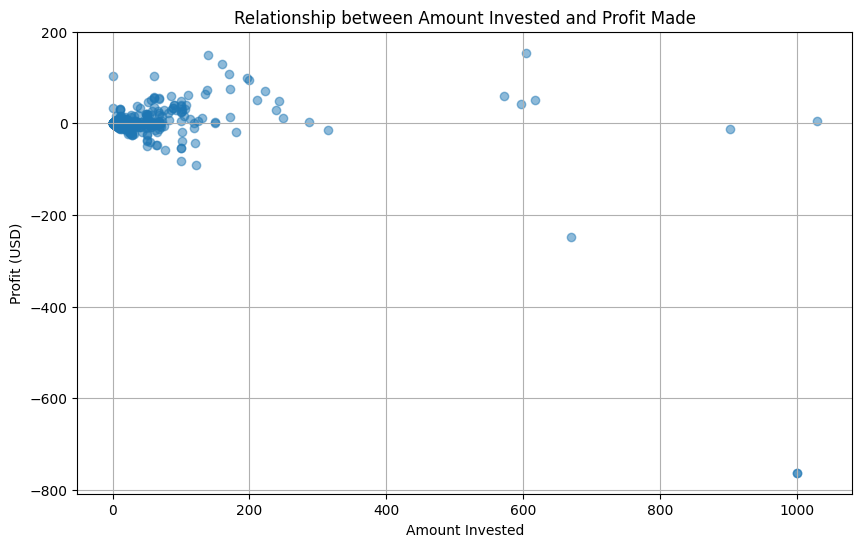

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
dataset_url = 'https://github.com/anoldwebsite/excelfiles/raw/main/closed_positions.xlsx'
df_full = pd.read_excel(dataset_url, usecols=['Amount', 'Profit(USD)', 'Copied From'])
# df_sample = df_full.sample(frac=0.01)

# Plot a scatter plot
plt.figure(figsize=(10, 6))
# plt.scatter(df_sample['Amount'], df_sample['Profit(USD)'], alpha=0.5)
plt.scatter(df_full['Amount'], df_full['Profit(USD)'], alpha=0.5)
plt.title('Relationship between Amount Invested and Profit Made')
plt.xlabel('Amount Invested')
plt.ylabel('Profit (USD)')
plt.grid(True)
plt.show()


In [ ]:
""
To drill down and gain more useful insights from the scatter plot, you can perform further analysis to identify patterns or relationships in the data. Here are some steps you can take:

Segmentation: You can segment the data based on different criteria such as the type of investment, the source of investment, or the time period. This will allow you to analyze each segment separately and identify any specific trends or patterns.

Correlation Analysis: Calculate the correlation coefficient between the amount invested and the profit made. This will help you understand the strength and direction of the relationship between the two variables. A correlation close to 1 indicates a strong positive correlation, while a correlation close to -1 indicates a strong negative correlation.

Regression Analysis: Perform a regression analysis to model the relationship between the amount invested and the profit made. This will allow you to predict the profit made for different amounts invested and identify any outliers or anomalies in the data.

Outlier Detection: Identify any outliers in the data that may be skewing the results. Outliers can indicate errors in data collection or unusual events that need further investigation.

Time-Series Analysis: If your dataset includes a time dimension, you can perform a time-series analysis to understand how the relationship between the amount invested and the profit made has evolved over time. This can help you identify seasonality or long-term trends in the data.

By applying these techniques, you can gain deeper insights into the relationship between the amount invested and the profit made and make more informed decisions based on your analysis.
"""